In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df = df.iloc[:,2:]

In [5]:
df.sample(5)

,Age,EstimatedSalary,Purchased
362,47,50000,1
43,30,15000,0
324,48,131000,1
269,40,61000,0
32,21,16000,0


### Train test split

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop('Purchased',axis=1),
                                                 df['Purchased'],
                                                 test_size=0.3,
                                                 random_state=0)

In [7]:
X_train.shape,X_test.shape

((280, 2), (120, 2))

### StandardScaler

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train) #Basically i am learning all the mean and standard deviation and storing it in scaler

# transform train and test sets by using the mean and standard deviation i found out by the above command
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)


In [9]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [10]:
X_train_scaler

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

* Sclaer actually takes dataframe as an input but returns numpy array as an out so it's not pretty to see. So we will change that

In [11]:
X_train_scaler = pd.DataFrame(X_train_scaler, columns = X_train.columns)
X_test_scaler = pd.DataFrame(X_test_scaler,columns = X_test.columns)

In [12]:
X_train_scaler

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [13]:
# For original data set
print(f'Observe the mean and standard deviation of original dataset: {np.round(X_train.describe(),1)}')
print(f'\n\nObserve the mean and standard deviation of scaled dataset: {np.round(X_train_scaler.describe(),1)}')

Observe the mean and standard deviation of original dataset:          Age  EstimatedSalary
count  280.0            280.0
mean    37.9          69807.1
std     10.2          34641.2
min     18.0          15000.0
25%     30.0          43000.0
50%     37.0          70500.0
75%     46.0          88000.0
max     60.0         150000.0


Observe the mean and standard deviation of scaled dataset:          Age  EstimatedSalary
count  280.0            280.0
mean     0.0              0.0
std      1.0              1.0
min     -1.9             -1.6
25%     -0.8             -0.8
50%     -0.1              0.0
75%      0.8              0.5
max      2.2              2.3


* As we can see the standard deviation for the same dataset has changed from 10.2 to 1 and the mean has changed from 37.9 to 0, and it has been the same for the both Age as well as Estimated salary

### Effect of Scaling

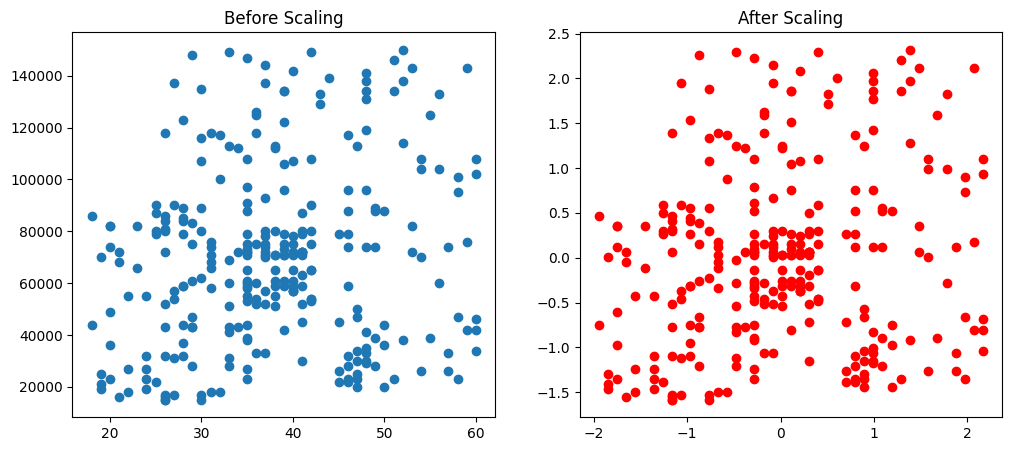

In [14]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaler['Age'],X_train_scaler['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

* The shape of the data did not changed but the scale has been changed so the data has be **centered**

c:\My Files\100 Days of Machine Learning\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\My Files\100 Days of Machine Learning\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\My Files\100 Days of Machine Learning\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\My Files\100 Days of Machine Learning\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated

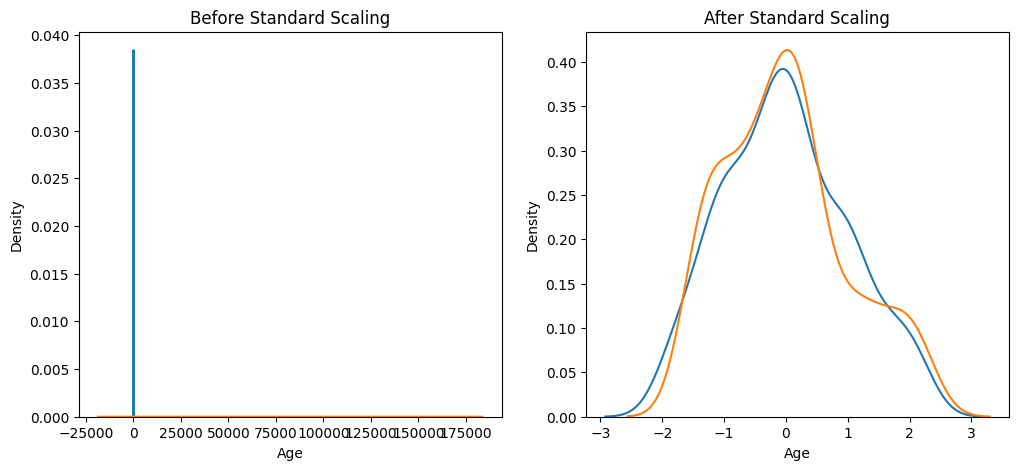

In [15]:
# Plotting Probablity density function
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

# before scaling
ax1.set_title("Before Standard Scaling")
sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train["EstimatedSalary"],ax=ax1)

# after scaling
ax2.set_title("After Standard Scaling")
sns.kdeplot(X_train_scaler['Age'],ax=ax2)
sns.kdeplot(X_train_scaler['EstimatedSalary'],ax=ax2)
plt.show()

* As i can see the pdf of age i.e blue line is just at one point and the pdf of salary is i.e the orange line is more desperced but horizontally, but this is not the case with the 2nd graph it's much better to make machine learning inferences

### Comparison of distribution

c:\My Files\100 Days of Machine Learning\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\My Files\100 Days of Machine Learning\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'This is after scaling'}, xlabel='Age', ylabel='Density'>

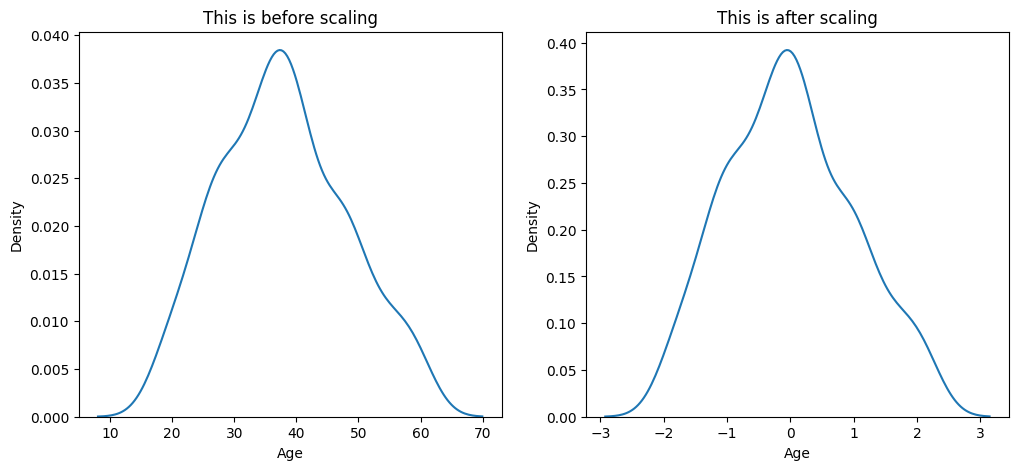

In [16]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

# before scaling
ax1.set_title("This is before scaling")
sns.kdeplot(X_train['Age'],ax=ax1)

# After Scaling
ax2.set_title("This is after scaling")
sns.kdeplot(X_train_scaler["Age"],ax=ax2)

* The impact of scaling on the age distribution is nothing because the distribution plot is identicle

c:\My Files\100 Days of Machine Learning\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\My Files\100 Days of Machine Learning\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'Estimated salary After Scaling scaling'}, xlabel='EstimatedSalary', ylabel='Density'>

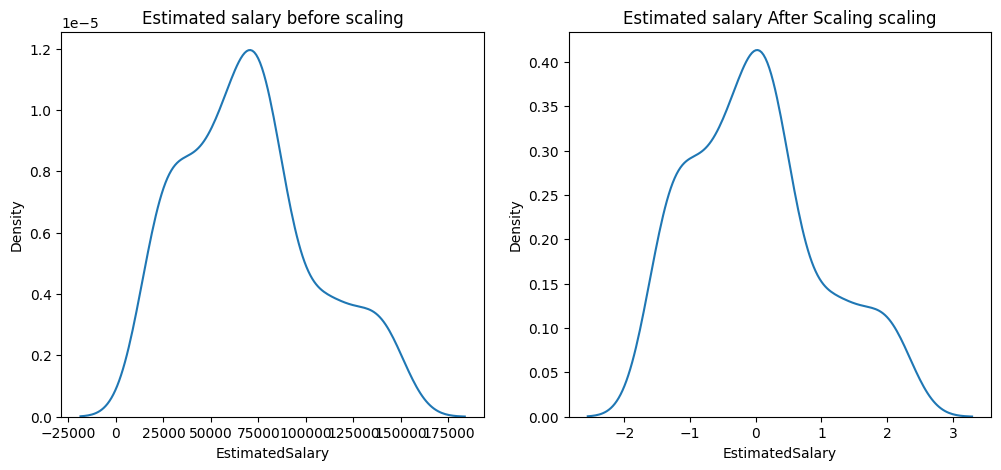

In [17]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

# before Scaling
ax1.set_title("Estimated salary before scaling")
sns.kdeplot(X_train["EstimatedSalary"],ax=ax1)

#After Scaling
ax2.set_title("Estimated salary After Scaling scaling")
sns.kdeplot(X_train_scaler["EstimatedSalary"],ax=ax2)

### Why scaling is important

### Logistical Regression 

In [18]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression() # Object to be sued in unscaled data
lr_scaled = LogisticRegression() # Object to be used in scaled data

In [19]:
lr.fit(X_train,y_train)

LogisticRegression()

In [20]:
lr_scaled.fit(X_train_scaler,y_train)

LogisticRegression()

In [21]:
y_pred = lr.predict(X_test)
y_perd_scaled = lr_scaled.predict(X_test_scaler)

In [22]:
from sklearn.metrics import accuracy_score

In [24]:
print(f"Accuracy for actual data: {accuracy_score(y_test,y_pred)}")
print(f"Accuracy score for scaled data: {accuracy_score(y_test,y_perd_scaled)}")

Accuracy for actual data: 0.875
Accuracy score for scaled data: 0.8666666666666667


### Scaling positively effects the logistically regression

### Decision tree regression

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [27]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaler,y_train)

DecisionTreeClassifier()

In [28]:
y_pred = dt.predict(X_test)
y_pred_scaler = dt_scaled.predict(X_test_scaler)

In [29]:
print(f"Accuracy for actual data: {accuracy_score(y_test,y_pred)}")
print(f"Accuracy score for scaled data: {accuracy_score(y_test,y_pred_scaler)}")

Accuracy for actual data: 0.875
Accuracy score for scaled data: 0.8666666666666667


* Decision tree is an algo that does not care about the scaling 

In [30]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


### Effect of Outlier

### Adding the oulier

In [31]:
df = pd.concat([df, pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),], ignore_index=True)


In [32]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


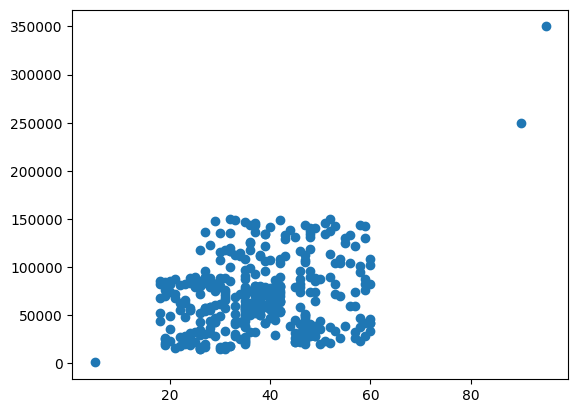

In [33]:
plt.scatter(df['Age'],df['EstimatedSalary'])

* I can visually see 3 new outlier that i have generated

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((282, 2), (121, 2))

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_train.columns)

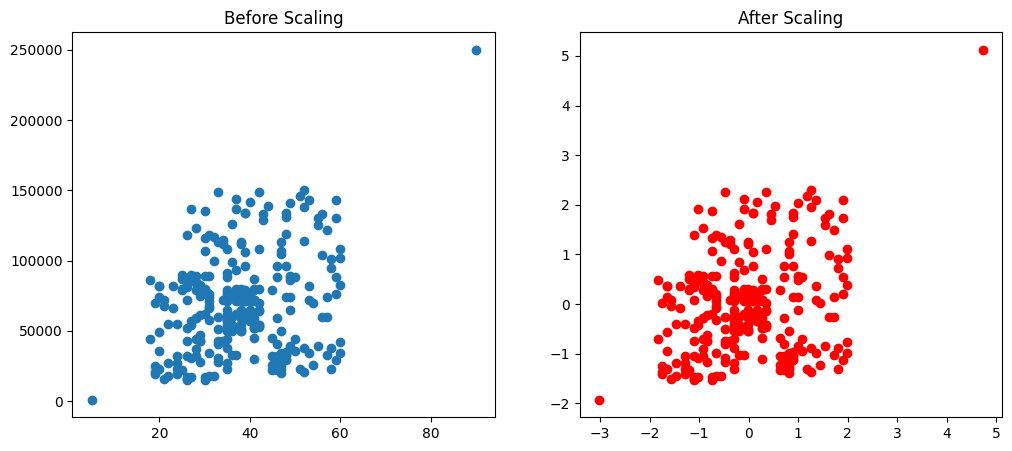

In [37]:
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

Outlier is still behaving like an outlier standardisation does not impacts that

### When to Use standardisation

**We can use standardisation for the following:-**
1. K-Means
2. K-Nearest-Neighbours
3. Principle Component Analysis (PCA)
4. Artificial Neural Network
5. Gradient Descent

### Where it's not necessassory to use Standardisation
1. Decision Tree
2. Random Forest